<span style="color:red">Assignment Grade: 10.00</span>


P1 grade: 10

P2 grade: 10

P3 grade: 10
* Great Job!

P4 grade: 10

Comments: 

* 


# Homework Assignment 2

Due February 14th at **10am**.  The pre-grading script should be up and running by Friday afternoon and will give you feedback in the **Task 5** item.  A note will be posted on CourseSpaces once the script is running.  Please save your assignment notebook in your **mp248** repo as **mp248/Assignment.2/Assignment.2.ipynb**. 


## P1: Quiz 2, extended. 

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a **dictionary**, $L$, where $L[k]$ is the number of times one needs to apply $f$ to turn $k$ into $1$, eg: $L[1]=0$, $L[2]=1$.

Consider the function $T(k) = L[1] + L[2] + \cdots + L[k]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for both (a) a linear and (b) a quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?   Plot the data together with the least-squares interpolation.  Provide a suitable title and legend -- include the coefficients of the least-squares fitting in the legend.

For the purposes of the pre-grading script, print out the values of $T(10)$, $T(100)$, $T(1000)$, $T(10000)$, and $T(100000)$. Put the values in a 5-element list, and print out that list.

**Note**: We will discuss least squares in the Monday Feb. 11th class.

[67, 3142, 59542, 849666, 10753840]


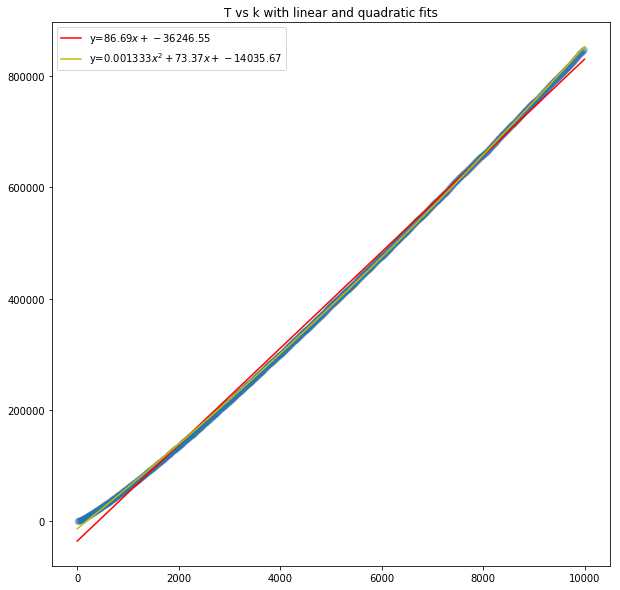

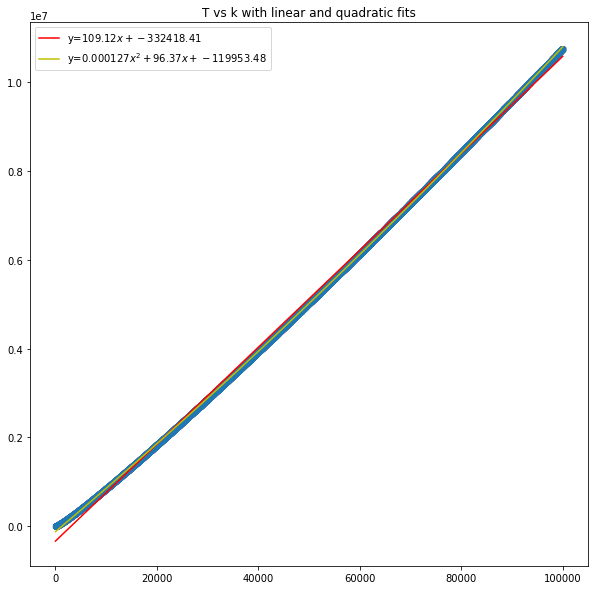

The quadratic line appears to be a better fit.


In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def f(n):
    if n%2 == 0:
        return int(n/2)
    else:
        return (3*n + 1)

def L(k):
    d = {}
    nums = list(range(1, k+1))
    for n in nums:
        d[n] = recursive(n,0)
    return d

def recursive(n,k):
    if n == 1:
        return k
    s = f(n)
    L = recursive(s,k+1)
    return L
    
def T(k):
    i = 1
    Tval = 0
    Lval = L(k)
    for i in range(1,k+1):
        Tval = Tval + Lval[i]
    return Tval

vals = [T(10),T(100),T(1000),T(10000),T(100000)]
    
print(vals)

#print(L(10))

def plots(k):
    x = list(range(1,k))
    y = list()
    Lvals = L(k)
    T = 0
    for q in x:
        Lval = Lvals[q]
        T = T + Lval
        y.append(T)
        
    plt.figure(figsize=(10,10))    
    
    plt.scatter(x,y,alpha=0.01)
    plt.title("T vs k with linear and quadratic fits")
    
    # linear fit:
    A = np.matrix([[1.0, x0] for x0 in x]).T
    y0 = np.matrix(y).T
    c = np.linalg.inv(A*A.T)*A*y0
    ran = [c[0,0] + c[1,0]*xval for xval in x]
    plt.plot(x, ran, 'r-', label='y=$%2.2fx+%2.2f$' %(c[1,0], c[0,0]))
    plt.legend()
    
    
    # quadratic fit:
    A = np.matrix([[1.0, x0, x0**2] for x0 in x]).T
    y0 = np.matrix(y).T
    c = np.linalg.inv(A*A.T)*A*y0
    ran = [c[0,0] + c[1,0]*xval + c[2,0]*xval**2 for xval in x]
    plt.plot(x, ran, 'y-', label='y=$%2.6fx^2+%2.2fx+%2.2f$' %(c[2,0], c[1,0], c[0,0]))
    plt.legend()
    
    plt.show()
    
plots(10000)
plots(100000)

print("The quadratic line appears to be a better fit.")

## P2 : Simple Equation Solver

While Newton's method is an excellent way to solve equations, in practice there is a more reliable way to solve equations, called the **subdivision method**. 

The heart of the subdivision method is the **intermediate value theorem** which states that if a function $f: [a,b] \to \mathbb R$ is *continuous* then for any $y_0$ between $f(a)$ and $f(b)$ (not equal to $f(a)$ or $f(b)$), there exists $t_0 \in (a,b)$ with $f(t_0) = y_0$. This theorem is the inspiration for:

**The Subdivision method** for solving $f(t)=0$. 

Given a continuous function $f : [a,b] \to \mathbb R$ with $f(a)$ and $f(b)$ having opposite signs (in particular, not zero), let $t_0$ be the *mid-point* of the interval $[a,b]$ i.e. $t_0 = \frac{a+b}{2}$.  We know by the intermediate value theorem that $f(t)=0$ has a solution in the interval.  Moreover, if $f(t_0)$ has the same sign as $f(b)$, then by the intermediate value theorem, a solution *must be* in the interval $[a,t_0]$.  Similarly, if $f(t_0)$ has the same sign as $f(a)$, a solution *must be* in the interval $[t_0,b]$. 

The *subdivision method* is to repeat this process of replacing the interval $[a,b]$ by either $[a,t_0]$ or $[t_0,b]$ until your interval is shorter than your acceptable error in approximation. 

**The problem** Write a Python function *subdiv(f,x,a,b,eps)* that takes as input a sympy function $f$ with variable $x$, with left endpoint $a$ and right endpoint $b$. *eps* is your acceptable amount of error.  The function subdiv will iterate the subdivision method until the interval containing a root is shorter than *eps*.  The function will return the endpoints of the interval, together with the number of iterations.  Find the root of $x^x-2$ in the interval $[1,2]$.  Set $eps = \frac{1}{10^k}$ for $k=1,2,3,4,5,6$, printing the output of *subdiv* in each case.

**Hint** When solving for the root of $x^x-2$, using endpoints $1.0$ and $2.0$ with *eps=0.5*, *subdiv* should take only one iteration. Using *eps=1.0* it should take zero.

In [6]:
from sympy import *
def subdiv(f,x,a,b,eps,count):
    count = count + 1
    fa = f.subs({x: a})
    fb = f.subs({x: b})
    t0 = (a + b)/2.0
    f0 = f.subs({x: t0})
    if (f0 > 0 and fa < 0) or (f0 < 0 and fa > 0):
        b = t0
    else:
        a = t0
    if abs(f0) > eps:
        val = subdiv(f,x,a,b,eps,count)
        return val
    else:
        #print(f0)
        return a,b,count
    
x = symbols('x')
a = 1.0
b = 2.0
f = (x**x) - 2.0


for k in range(1, 7):
    count = 0
    eps = 1.0/(10.0**k)
    val = subdiv(f,x,a,b,eps,count)
    print(val)


(1.5, 1.5625, 4)
(1.5, 1.5625, 4)
(1.5595703125, 1.560546875, 10)
(1.5595703125, 1.55963134765625, 14)
(1.5596084594726562, 1.5596160888671875, 17)
(1.559610366821289, 1.5596122741699219, 19)


## P3: Extended Newton method example.

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^3+1}{3z^2}$$

In this problem we ask you to use Sympy to find the points in the plane where Newton's method eventually fails, i.e. find all the initial 
conditions $z_0$ such that $N^{(k)}(z_0) = 0$ for some $k$.  Clearly, Newton's method fails for $z_0 = 0$, with $k=0$, i.e. it fails immediately.  We say Newton's method fails in one step if $N^{(1)}(z_0) = 0$, and two steps if $N^{(2)}(z_0)=0$, etc. 

Plot the points where Newton's method fails in $k$ steps for $k=0,1,2,3,4,\cdots, 10$.  Use a different color for each $k$. 

We denote the set where Newton's method fails in $k$ steps by $F_k$. 

$$F_0 = \{0\}$$

and

$$F_k = \{ z_0 : N(z_0) = \frac{2z_0^3+1}{3z_0^2} \in F_{k-1} \}$$

Thus, provided we know $F_{k-1}$ we can solve for $F_k$, as the solution set to the equation

$$ F_k = \{ z_0 : 2z_0^3+1 = 3f_{k-1}z_0^2, f_{k-1} \in F_{k-1} \}$$

$$F_k = \{ z_0 : 2z_0^3-3f_{k-1}z_0^2+1 = 0, f_{k-1} \in F_{k-1} \}$$

We can solve this equation exactly in closed form using Sympy -- you will likely find this slow. 

More pragmatically, we can solve it using complex floats with the [*mpmath*](http://mpmath.org/doc/current/calculus/polynomials.html) library. 

**Advice** Please use a careful choice of *markersize* in your point plot so that you can see the underlying shape of the scatter plot. i.e. try to avoid big points crowding each other out. Also set *figsize* to (12,12), to ensure your plot is reasonably large.

**Advice** Choose your *xlim* and *ylim* so that your image $x$ and $y$ coordinates vary between $-2$ and $2$. As you will see, there *are* solutions outside of this square, but they are rather rare, and having them in the plot wrecks the scale.

Use **%matplotlib inline** to ensure your plots are saved in your notebook.  

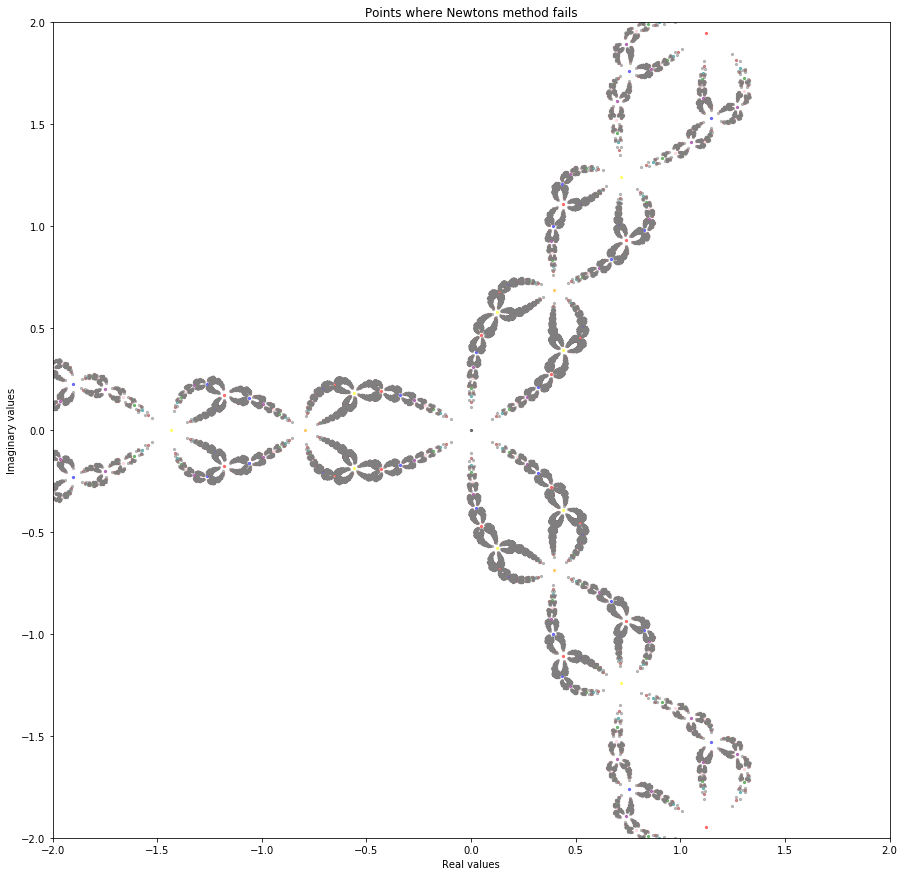

In [8]:


from mpmath import *
import numpy as np

def findzeros(F):
    zval = list()
    for f in F:
        roots = polyroots([2,-3*f,0,1])
        for r in roots:
            zval.append(r)   
    return zval
       
def coords(F,colour):
    x = list()
    y = list()
    i = 0
    while i < len(F):
        x.append(re(F[i]))
        y.append(im(F[i]))
        i = i + 1
    plt.scatter(x,y,alpha=0.5,c=colour,s=5)
    return x,y  

plt.figure(figsize=(15,15)) ### thought this looked better than 12x12, hope thats okay...
plt.scatter(0,0,alpha=0.5,c='black',s=5)
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)

F0 = [0.0]
F1 = findzeros(F0)
coords(F1,'orange')
F2 = findzeros(F1)
coords(F2,'yellow')
F3 = findzeros(F2)
coords(F3,'red')
F4 = findzeros(F3)
coords(F4,'blue')
F5 = findzeros(F4)
coords(F5,'purple')
F6 = findzeros(F5)
coords(F6,'pink')
F7 = findzeros(F6)
coords(F7,'green')
F8 = findzeros(F7)
coords(F8,'teal')
F9 = findzeros(F8)
coords(F9,'brown')
F10 = findzeros(F9)
coords(F10,'grey')

plt.title("Points where Newtons method fails")
plt.xlabel("Real values")
plt.ylabel("Imaginary values")

plt.show()

## P4: Doubling roots

Recall our *doubling function* $f$ from the start of the Sympy notebook (7).   One way to express it is via the floor function $\lfloor x \rfloor$ 

$$f(x) = 2x - \lfloor 2x \rfloor.$$

The floor function $\lfloor x \rfloor$ is the largest integer $k$ with $k \leq x$.  

Using Python and the Sympy library, compute the iterates $f^{(k)}(\sqrt{2})$ for $k=0,1,2,\cdots, 1000$.  By iterates we mean 
$$f^{(0)}(\sqrt{2}) = \sqrt{2}$$
$$f^{(1)}(\sqrt{2}) = f(\sqrt{2})$$
$$f^{(2)}(\sqrt{2}) = f(f(\sqrt{2}))$$ 
$$f^{(3)}(\sqrt{2}) = f(f(f(\sqrt{2})))$$

Verify that $f^{(i)}(\sqrt{2}) \neq f^{(j)}(\sqrt{2})$ if and only if $i = j$.

Using the sort function (**sorted**) linearize the iterates, i.e. compute a sequence $j_0, j_1, \cdots, j_{1000}$ such that

$$f^{(j_0)}(\sqrt{2}) < f^{(j_1)}(\sqrt{2}) < \cdots < f^{(j_{1000})}(\sqrt{2}).$$

Store the sequence $J = (j_0, j_1, \cdots, j_{1000})$ as a list, and print it.

**Note**: If Sympy's implementation of the inequality $<$ fails you, perhaps work around it creatively using *evalf*. 

If you have trouble answering this question for **1000** iterations, as asked, you will get partial credit for a correct answer for **200**, **400**, **600** or **800** iterations, respectively.  You will receive more partial credit the closer you are to **1000** points. But please do not answer this question for any other number of iterations as the pre-grading script will not look for that answer.   As a sanity check, note that any answer to this problem for **1000** iterations should be a list with **1001** elements.

In [2]:
from sympy import *
import sympy as sp

def recursive(x, func, x0, f, k):
    if k == 345:
        val = func.subs({x: x0}).evalf(200) ## this seems to fix the issue of one value being too close to zero
        ###print(val)                       ## without loosing too much precision
    else:
        val = func.subs({x: x0})
    f.append(val)
    k = k + 1
    if k < 1000:
        #print(k, end=" ")
        r = recursive(x, func, val, f, k)
        return r
    return f

k = 0
x = symbols('x')
func = 2*x - floor(2*x)
f = list()
f.append(sp.sqrt(2))
output = recursive(x, func, sp.sqrt(2), f, k)
#print(output)

final = sorted(f)
j = 0
while j < 1000:
    if final[j] >= final[j + 1]:
        print("two values are the same or in the wrong order :(")  
        #print(final[j], final[j + 1])
    j = j + 1
    
    
###print(final)

order = list()
for x in final:
    p = 0
    while p < len(final):
        if x == f[p]:
            order.append(p)
            #print(p)
        p = p + 1

print(order)
#print("end")
#print(len(order))

[602, 452, 603, 453, 522, 604, 454, 523, 995, 279, 978, 605, 455, 7, 710, 583, 524, 146, 948, 272, 224, 928, 360, 918, 996, 280, 979, 684, 56, 606, 456, 180, 884, 8, 711, 545, 216, 584, 525, 147, 949, 404, 273, 857, 225, 621, 929, 464, 417, 536, 313, 285, 361, 383, 919, 518, 997, 680, 281, 980, 685, 57, 667, 607, 911, 457, 160, 984, 181, 80, 885, 749, 494, 9, 300, 788, 696, 247, 712, 546, 217, 306, 689, 324, 61, 585, 671, 526, 148, 800, 950, 405, 199, 734, 597, 274, 705, 858, 226, 622, 758, 850, 508, 769, 930, 611, 651, 794, 725, 465, 418, 537, 314, 286, 127, 429, 362, 384, 478, 920, 867, 559, 331, 519, 998, 992, 269, 357, 915, 681, 53, 881, 213, 461, 414, 282, 380, 515, 664, 981, 244, 686, 58, 668, 731, 702, 608, 912, 50, 458, 661, 161, 970, 985, 182, 81, 886, 750, 495, 164, 10, 973, 301, 789, 697, 574, 441, 397, 839, 248, 641, 713, 547, 105, 257, 942, 218, 307, 690, 325, 833, 62, 586, 672, 527, 149, 801, 951, 903, 406, 200, 735, 68, 598, 275, 706, 579, 846, 863, 988, 240, 46, 829, 85

In [3]:
import operator as op
import sympy as sp

## flexible version of the Collatz iterator
def f(x, dec=20):
    x = 2*x
    while x.evalf(dec)>=1:
        x -= 1
    while x.evalf(dec)<0:
        x += 1
    return(x)

def printANS(n, dec=20):
    S=[sp.sqrt(2)]
    for i in range(n):
        S.append(f(S[-1], dec))

    Sc = [(S[i].evalf(dec), i) for i in range(len(S))]
    Sx = sorted(Sc, key=op.itemgetter(0)) 
    #print("Ans for n==",n, "dec==",dec)
    #print([x[2] for x in Sx])
    print([Sx[i][1] for i in range(10)])
    return [x[1] for x in Sx]
    
res200=printANS(200, 20)
res1000=printANS(1000, 120)

correct = 0
for i in range(len(res200)):
    if res200[i] == res200[i]:
        correct += 1
print("Out of 201, the student got ",correct," correct")
correct = 0
for i in range(len(res1000)):
    if res1000[i] == order[i]:
        correct += 1
print("Out of 1001, the student got ",correct," correct")        

[7, 146, 56, 180, 8, 147, 57, 160, 181, 80]
[602, 452, 603, 453, 522, 604, 454, 523, 279, 605]
Out of 201, the student got  201  correct
Out of 1001, the student got  8  correct
